In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.image import imread
import cv2
import random
from os import listdir 
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing import image
from keras.utils import load_img,img_to_array,array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dropout,Dense
from sklearn.model_selection import train_test_split



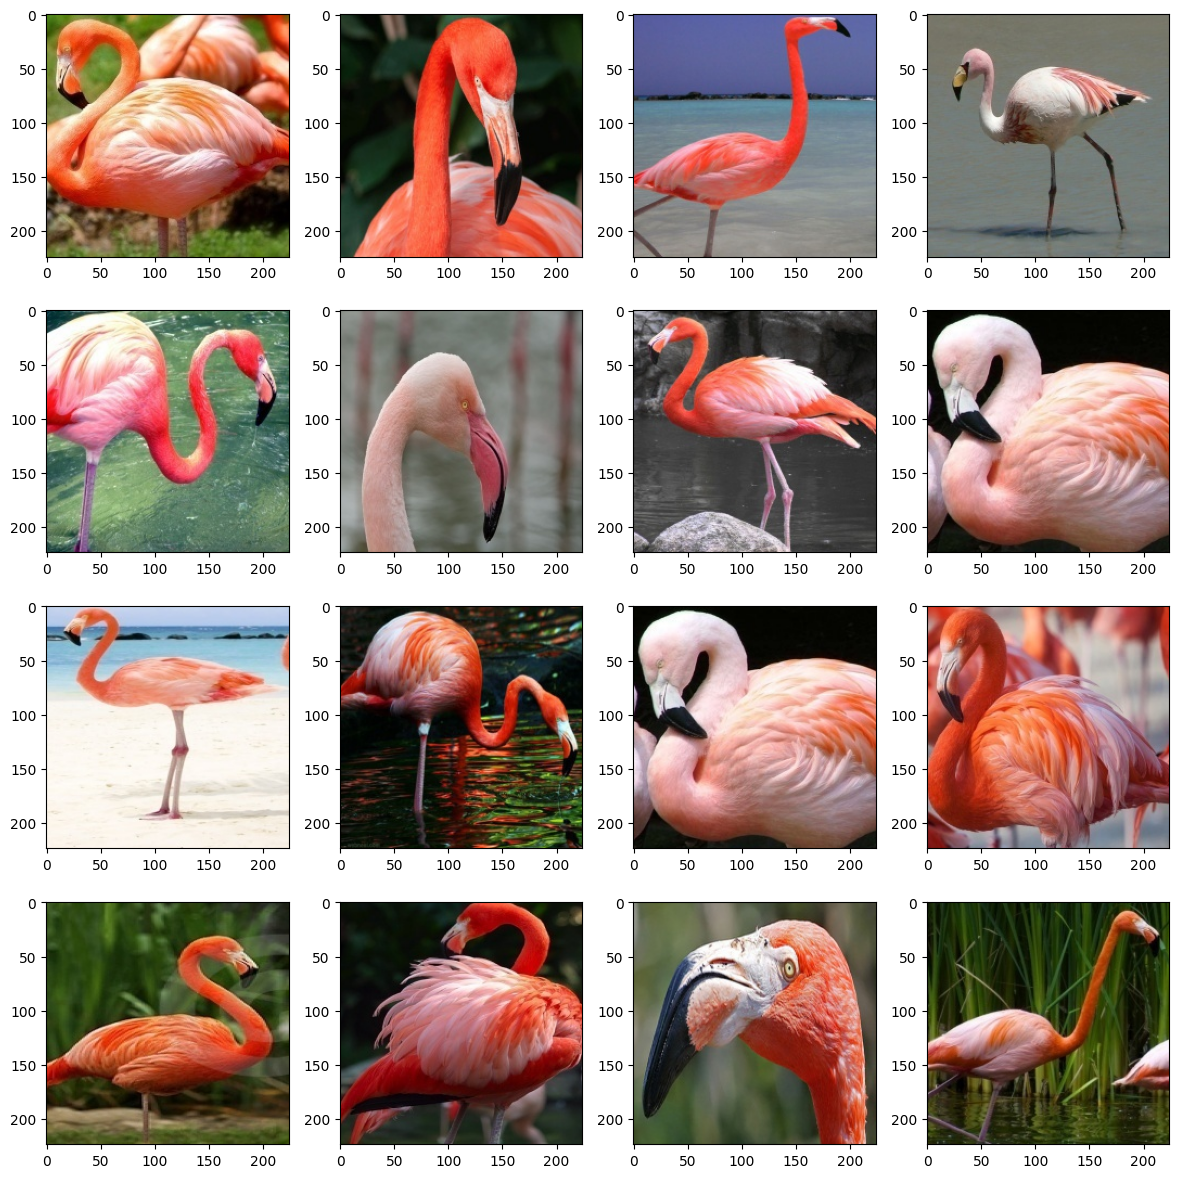

In [2]:
plt.figure(figsize=(12,12))
path = "Bird Speciees Dataset//FLAMINGO"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path+"//"+random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)

In [3]:
dir = "Bird Speciees Dataset"
root_dir = listdir(dir)
image_list , label_list = [],[]



In [4]:
for directory in root_dir:
    for files in listdir(f"{dir}/{directory}"):
        image_path= f"{dir}/{directory}/{files}"
        image = cv2.imread(image_path)
        image = img_to_array(image)
        image_list.append(image)
        label_list.append(directory)
        

In [5]:
label_count = pd.DataFrame(label_list).value_counts()


In [6]:
label_count

0                 
AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
Name: count, dtype: int64

In [7]:
num_classes = len(label_count)
image_list[0].shape

(224, 224, 3)

In [8]:
label_list = np.array(label_list)
label_list.shape

(811,)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(image_list,label_list,test_size=0.2,random_state=9)

In [10]:
X_train = np.array(X_train, dtype=np.float16)/255.0
X_test = np.array(X_test, dtype=np.float16)/255.0
X_train = X_train.reshape(-1,224,224,3)
X_test = X_test.reshape(-1,224,224,3)

In [11]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


In [12]:
X_train,X_val,y_train,y_val= train_test_split(X_train,
                                              y_train,
                                              test_size=0.2,
                                              random_state=9)

In [13]:
model = Sequential()
model.add(Conv2D(8,(3,3),padding="same",input_shape=(224,224,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(num_classes,activation="softmax"))
model.summary()

c:\Users\arif\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 74, 74, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       331,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,038 (1.29 MB)

 Trainable params: 338,038 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss= "categorical_crossentropy",
              optimizer = Adam(0.0005),
              metrics = ["accuracy"])

In [15]:
epoch = 50
batch_size= 128
history = model.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    validation_data=(X_val,y_val))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.1912 - loss: 1.7885 - val_accuracy: 0.3231 - val_loss: 1.7253
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.2697 - loss: 1.7686 - val_accuracy: 0.3923 - val_loss: 1.6515
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.4406 - loss: 1.6190 - val_accuracy: 0.4846 - val_loss: 1.4843
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5491 - loss: 1.4327 - val_accuracy: 0.5615 - val_loss: 1.3415
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5985 - loss: 1.2847 - val_accuracy: 0.5615 - val_loss: 1.2559
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6169 - loss: 1.1634 - val_accuracy: 0.6692 - val_loss: 1.1128
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7660 - loss: 0.9216 - val_accuracy: 0.7077 - val_loss: 0.9552
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7205 - loss: 0.8616 - val_accuracy: 0.7308 - val_loss: 0.9449

In [16]:
model.save("bird_pred_code.h5")

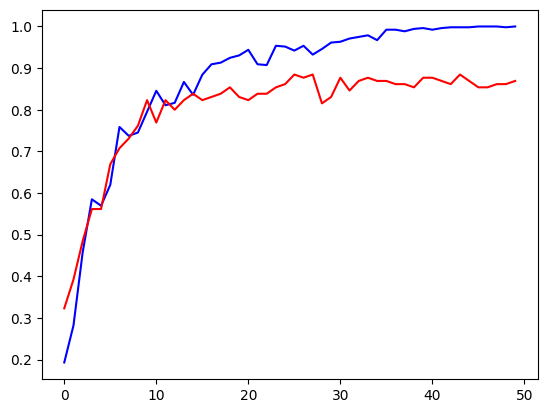

In [17]:
plt.plot(history.history["accuracy"],color="b")
plt.plot(history.history["val_accuracy"],color="r")

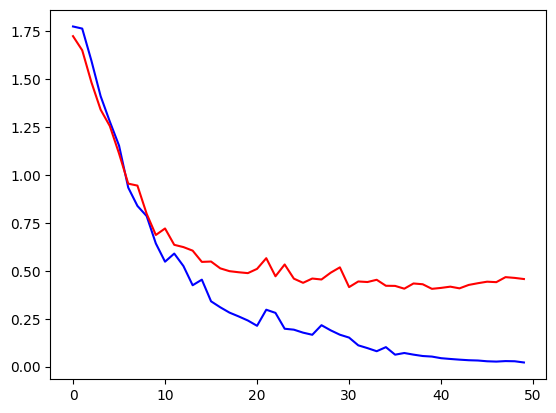

In [18]:
plt.plot(history.history["loss"],color="b")
plt.plot(history.history["val_loss"],color="r")

In [19]:
score =model.evaluate(X_test,y_test)
print("Accuracy:",score[1]*100)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7896 - loss: 0.6758 
Accuracy: 80.98159432411194


In [20]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [21]:
X_test.shape

(163, 224, 224, 3)

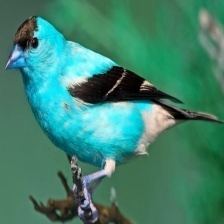

In [22]:
rand_img = np.random.randint(-1,163)
img = array_to_img(X_test[rand_img])
img

In [23]:
labels= lb.classes_
print(labels)
print("Original", labels[np.argmax(y_test[rand_img])])
print("predicted:", labels[np.argmax(y_pred[rand_img])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Original AMERICAN GOLDFINCH
predicted: AMERICAN GOLDFINCH


In [24]:
from keras.layers import SpatialDropout2D

In [30]:
model = Sequential()
model.add(Conv2D(8,(3,3),padding="same",input_shape=(224,224,3),activation="relu"))
model.add(SpatialDropout2D(0.33))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16,(3,3),padding="same",activation="relu"))
model.add(SpatialDropout2D(0.33))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),padding="same",activation="relu"))
model.add(SpatialDropout2D(0.33))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(num_classes,activation="softmax"))
model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_3             │ (None, 224, 224, 8)    │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 74, 74, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_4             │ (None, 74, 74, 16)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 37, 37, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 37, 37, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_5             │ (None, 37, 37, 32)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │       331,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 338,038 (1.29 MB)

 Trainable params: 338,038 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss= "categorical_crossentropy",
              optimizer = Adam(0.0005),
              metrics = ["accuracy"])

In [32]:
epoch = 50
batch_size= 128
history = model.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    validation_data=(X_val,y_val))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.1759 - loss: 1.8119 - val_accuracy: 0.2000 - val_loss: 1.7647
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.1971 - loss: 1.7865 - val_accuracy: 0.1769 - val_loss: 1.7656
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.1965 - loss: 1.7820 - val_accuracy: 0.3462 - val_loss: 1.7484
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.2684 - loss: 1.7554 - val_accuracy: 0.2846 - val_loss: 1.7456
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.2713 - loss: 1.7464 - val_accuracy: 0.2615 - val_loss: 1.7348
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.2723 - loss: 1.7409 - val_accuracy: 0.3231 - val_loss: 1.7142
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.2861 - loss: 1.7077 - val_accuracy: 0.2385 - val_loss: 1.6962
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.2615 - loss: 1.7293 - val_accuracy: 0.3462 - val_loss: 1.6749

In [33]:
score = model.evaluate(X_test,y_test)
print("Dropout accuracy:",score[1]*100)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.8166 
Dropout accuracy: 70.55214643478394


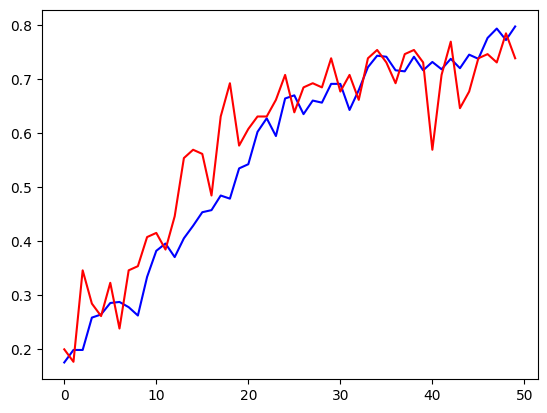

In [34]:
plt.plot(history.history["accuracy"],color="b")
plt.plot(history.history["val_accuracy"],color="r")